# Statistics for Data Science with Python

In [2]:
import requests
import os 
from PIL import Image
from IPython.display import IFrame

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [4]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

## Task 1: Become familiar with the dataset
The following describes the dataset variables:

· CRIM - per capita crime rate by town

· ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

· INDUS - proportion of non-retail business acres per town.

· CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

· NOX - nitric oxides concentration (parts per 10 million)

· RM - average number of rooms per dwelling

· AGE - proportion of owner-occupied units built prior to 1940

· DIS - weighted distances to five Boston employment centres

· RAD - index of accessibility to radial highways

· TAX - full-value property-tax rate per $10,000

· PTRATIO - pupil-teacher ratio by town

· LSTAT - % lower status of the population

· MEDV - Median value of owner-occupied homes in $1000's

In [6]:
print(boston_df.head())


   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  


### Those are the data for the first 5 rows

In [7]:
print(boston_df.columns)


Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')


### Those are the columns' names on the table

In [8]:
print(boston_df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
        'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']].describe().round(2))

         CRIM      ZN   INDUS    CHAS     NOX      RM     AGE     DIS     RAD  \
count  506.00  506.00  506.00  506.00  506.00  506.00  506.00  506.00  506.00   
mean     3.61   11.36   11.14    0.07    0.55    6.28   68.57    3.80    9.55   
std      8.60   23.32    6.86    0.25    0.12    0.70   28.15    2.11    8.71   
min      0.01    0.00    0.46    0.00    0.38    3.56    2.90    1.13    1.00   
25%      0.08    0.00    5.19    0.00    0.45    5.89   45.02    2.10    4.00   
50%      0.26    0.00    9.69    0.00    0.54    6.21   77.50    3.21    5.00   
75%      3.68   12.50   18.10    0.00    0.62    6.62   94.07    5.19   24.00   
max     88.98  100.00   27.74    1.00    0.87    8.78  100.00   12.13   24.00   

          TAX  PTRATIO   LSTAT    MEDV  
count  506.00   506.00  506.00  506.00  
mean   408.24    18.46   12.65   22.53  
std    168.54     2.16    7.14    9.20  
min    187.00    12.60    1.73    5.00  
25%    279.00    17.40    6.95   17.02  
50%    330.00    19.05  

### Those are the main statistics for every column

# Task 2: Generate Descriptive Statistics and Visualizations
For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

## Task 2.1: For the "Median value of owner-occupied homes" provide a boxplot

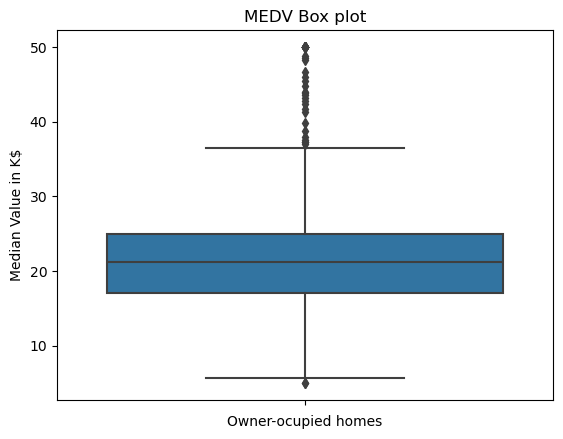

In [11]:
bdf_bp1=sns.boxplot( y='MEDV',data=boston_df)
bdf_bp1.set(xlabel='Owner-ocupied homes',ylabel='Median Value in K$',title='MEDV Box plot')
pyplot.show()

#### Explanation: Boxplot for Median value of owner-occupied homes shows a mean of 22.5K, Q1=17K and Q3=25K.
#### There is a maximun of 50K, and a minimun of 5K.

## Task 2.2: Provide a bar plot for the Charles river variable

[Text(0.5, 0, 'Tract bounds river'),
 Text(0.5, 1.0, 'Charles River bound bar plot')]

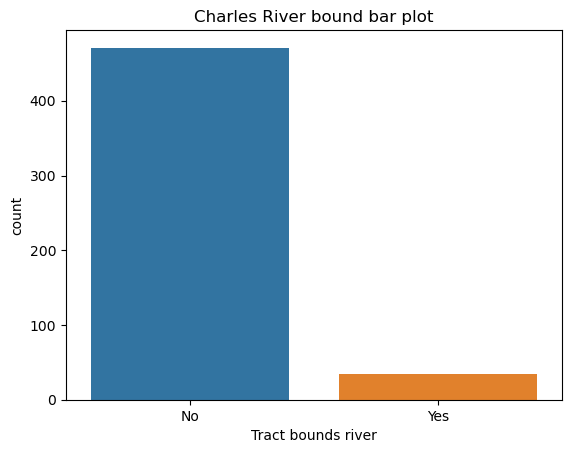

In [14]:
boston_df.loc[(boston_df['CHAS']==0),'CHAR']='No'
boston_df.loc[(boston_df['CHAS']==1),'CHAR']='Yes'
bchr=sns.countplot(data=boston_df,x="CHAR")
bchr.set(xlabel='Tract bounds river',title='Charles River bound bar plot')

#### Explanation: Bar plot for the Charles river variable (CHAS) shows that a low proportion of the homes are bounded to the river, while mostt of them are not bounded to the river.

### Task 2.3: Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)


[Text(0.5, 0, 'Median Value of owner-occupied homes in K$'),
 Text(0, 0.5, 'Age Group'),
 Text(0.5, 1.0, 'MEDV vs Age Group Box plot')]

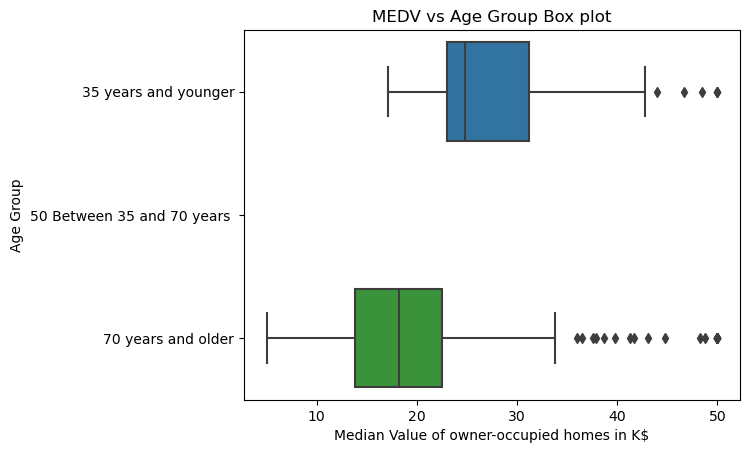

In [17]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'Between 35 and 70 years '
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'
bdf_bp2=sns.boxplot( y= 'age_group',x='MEDV',data=boston_df, order=['35 years and younger', '50 Between 35 and 70 years ','70 years and older'])
bdf_bp2.set(xlabel='Median Value of owner-occupied homes in K$', ylabel='Age Group', title= 'MEDV vs Age Group Box plot')

#### Explanation: Boxplot for Median value of owner-occupied homes vs the AGE variable shows that newer homes may be more spensive than the older ones.

### Task 2.4: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

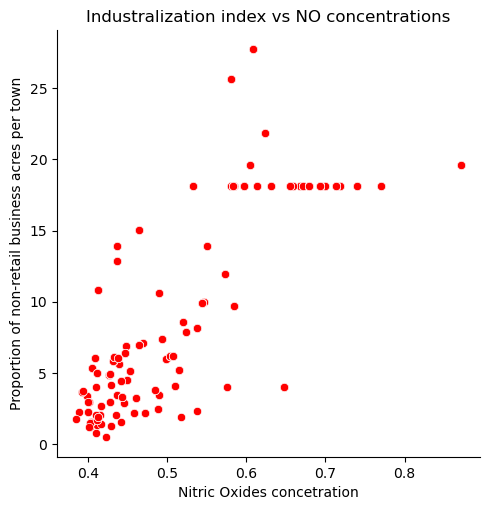

In [22]:
bdf_sp1=sns.relplot(data=boston_df,x="NOX",y="INDUS",color='red')
bdf_sp1.set(xlabel='Nitric Oxides concetration', ylabel='Proportion of non-retail business acres per town',title='Industralization index vs NO concentrations')


### Task 2.4.1: What can you say about the relationship?

#### Aparently from the scatter plot, it looks like there is a positive correlation between both variables
#### A Pearson Test would be advisible

In [36]:
scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])


PearsonRResult(statistic=0.7636514469209162, pvalue=7.913361061232958e-98)

#### Result: pvalue=7.91e-98. Being the p_value much lower than 0.05 and even of 0.01, we will reject the hipotesis that they are independent variables and assume than there is a positive correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town.

### Task 2.5: Create a histogram for the pupil to teacher ratio variable

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 0, 'Pupil to teacher ratio'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Educational rate')]

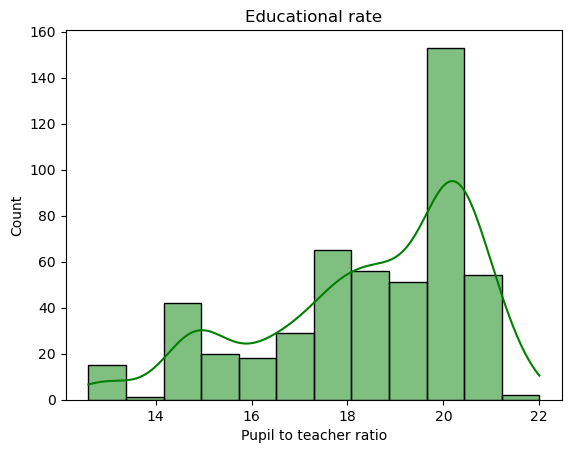

In [58]:
bdfh = sns.histplot(boston_df['PTRATIO'], bins=12,color='green',kde=True)
bdfh.set(xlabel='Pupil to teacher ratio', ylabel='Count',title='Educational rate')

#### Explanation: Pupils to teacher ratio presents left-skewed distribution with a peak arround 20 pupils per teacher. Most samples present a lower rate.

## Task 3: Use the appropriate tests to answer the questions provided.
For each of the following questions;

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test. For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

### Task 3.1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)


[Text(0, 0.5, "Median value of owner-occupied homes in $1000's"),
 Text(0.5, 0, 'Bounded to the river')]

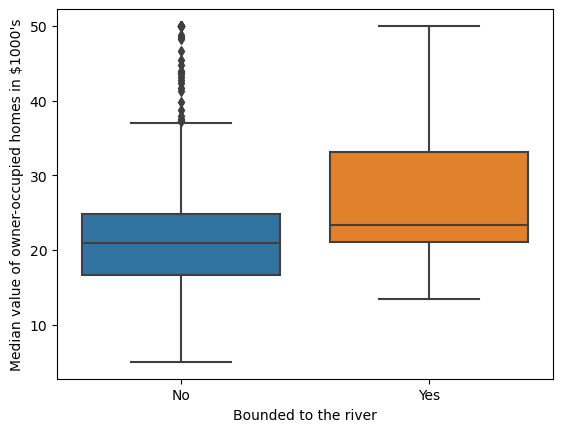

In [5]:
boston_df.loc[(boston_df['CHAS']==0),'River bound']='No'
boston_df.loc[(boston_df['CHAS']==1),'River bound']='Yes'
MC=sns.boxplot(data=boston_df, x="River bound", y="MEDV")
MC.set(ylabel= "Median value of owner-occupied homes in $1000's", xlabel="Bounded to the river")


##### It looks like there is a diference on the average of the houses median value, being the ones not bounded to the river cheaper.

#### ·State your hypothesis.
H0: µ1=µ2 (The means of median values of houses bounded or not by the Charles river are similar)

H1: µ1<>µ2 (The means of median values of houses bounded or not by the Charles river are diferent)

α = 0.05

We will be using the t-test for independent samples. For the independent t-test, the following assumptions must be met:
* One independent, categorical variable with two levels or group:
  That will be 'CHAS'
* One dependent continuous variable:
  That will be 'MEDV'
* Independence of the observations. Each subject should belong to only one group:
There is no relationship between the observations in each group.
* The dependent variable must follow a normal distribution:
Test of Kurtosis indicates that is fairly aceptable.
* Assumption of homogeneity of variance:
p-value< 0.05 from Levene test alows us to assume homogeneity of variance

In [59]:
print('Kurtosis 1:',round( scipy.stats.kurtosis(boston_df[boston_df['CHAS']==1]['MEDV']),2))

print('Kurtosis 0: ',round( scipy.stats.kurtosis(boston_df[boston_df['CHAS']==0]['MEDV']),2))


print(scipy.stats.levene(boston_df[boston_df['CHAS']==1]['MEDV'],
                   boston_df[boston_df['CHAS']==0]['MEDV'],center='mean'))

Kurtosis 1: -0.54
Kurtosis 0:  1.51
LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)


In [61]:
# We calculate both groups means:
print('Bound to the river MEDV mean: ',round(np.mean(boston_df[boston_df['CHAS']==1]['MEDV']),2),'K$')
print('Not bound to the river MEDV mean: ',round(np.mean(boston_df[boston_df['CHAS']==0]['MEDV']),2),'K$')

Bound to the river MEDV mean:  28.44 K$
Not bound to the river MEDV mean:  22.09 K$


In [62]:
# Then we proceed with T-test

print(scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==1]['MEDV'],
                   boston_df[boston_df['CHAS']==0]['MEDV']))

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)


#### Result:pvalue=7.39e-05. As p_value is lower than 0.05, we can reject H0 and assume that there is a diference betwen both samples means

### Task 3.2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

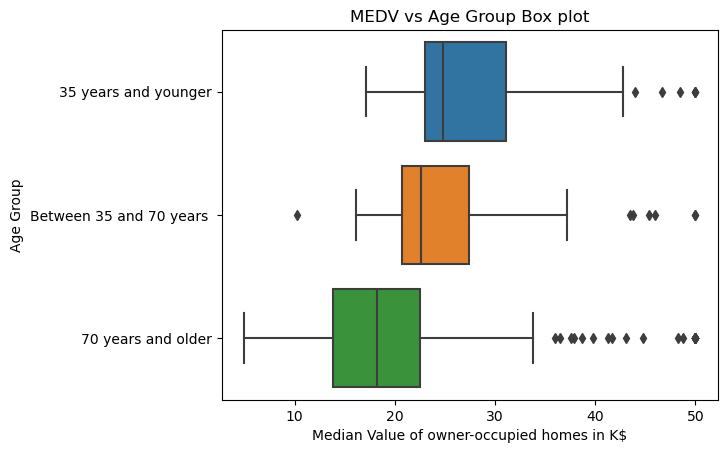

In [20]:
# For this question we count with the already prepared variable 'age_group'. 

boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'Between 35 and 70 years '
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'
bdf_bp2=sns.boxplot( y= 'age_group',x='MEDV',data=boston_df, order=['35 years and younger', 'Between 35 and 70 years ','70 years and older'])
bdf_bp2.set(xlabel='Median Value of owner-occupied homes in K$', ylabel='Age Group', title= 'MEDV vs Age Group Box plot')
pyplot.show()


##### It looks like there is a diference in mean of houses'median values, being the olders cheaper than new ones.

#### ·State your hypothesis.
H0: µ1=µ2=µ3 (The mean values of each proportion of owner occupied units built prior to 1940 are equal).

H1: at least a mean is different.

α = 0.05

In [30]:
# In order to make program cleaner, a variable is asigned to every group


T35_lower_MEDV = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
T35_to_70_MEDV = boston_df[boston_df['age_group'] == 'Between 35 and 70 years ']['MEDV']
T70_upperr_MEDV = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [31]:
# For ANOVA test we use F statistic

f_statistic,p_value=scipy.stats.f_oneway(T35_lower_MEDV,T35_to_70_MEDV,T70_upperr_MEDV)
print("F_Statistic:{0},P_Value:{1}".format(f_statistic,p_value))

F_Statistic:36.40764999196599,P_Value:1.7105011022702984e-15


#### Result:P_Value= Ç1.71e-15. As p_value is much lower than α, we can discard H0, accept H1, and conclude that: there is a difference in Median values of houses (MEDV) for, at least, one group of proportion of owner occupied units built prior to 1940 (AGE, age_group)

### Task 3.3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

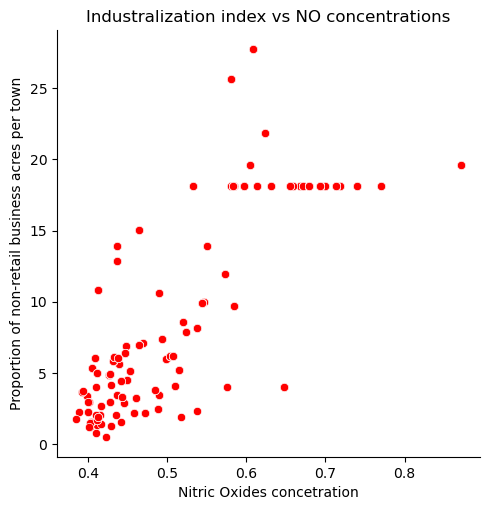

In [32]:
# First we draw a scatter plot

bdf_sp1=sns.relplot(data=boston_df,x="NOX",y="INDUS",color='red')
bdf_sp1.set(xlabel='Nitric Oxides concetration', ylabel='Proportion of non-retail business acres per town',title='Industralization index vs NO concentrations')


#### ·State your hypothesis.
H0: Nitric oxide concentrations (NOX) is not correlated with Proportion of non-retail business acres per town (INDUS)

H1: Nitric oxide concentrations (NOX) is correlated with Proportion of non-retail business acres per town (INDUS)

α = 0.05

In [33]:
# Then we perform the Pearson test.

scipy.stats.pearsonr(boston_df['INDUS'],boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209162, pvalue=7.913361061232958e-98)

#### Result: pvalue=7.91e-98. As p_value is much lower than α, we can reject H0 and, therefore, we assume that such a relation exist.


#### Explanation: The answer to that 3.3 question is: No, we can´t conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town and, therefore, we assume that there is a correlation between both variables.

### Task 3.4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)


#### First we draw a scatter plot:

[Text(0.5, 1.0, 'MEDV vs Weighted distance employment centres'),
 Text(0.5, 0, 'Weighted distance to the five Boston employment centres'),
 Text(0, 0.5, 'Median value of owner occupied homes $1000s')]

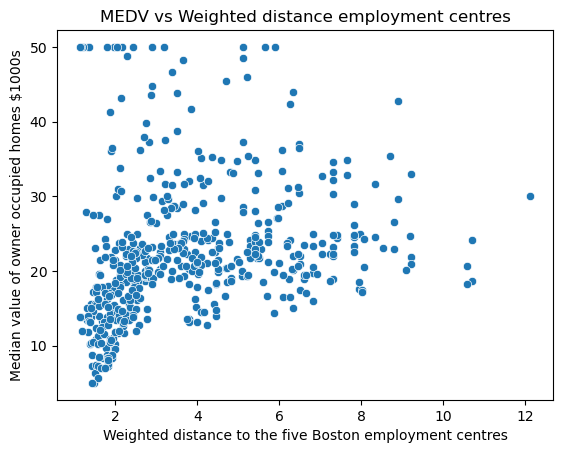

In [39]:
indusnox=sns.scatterplot(x='DIS',y='MEDV',data=boston_df)
indusnox.set(title='MEDV vs Weighted distance employment centres', xlabel= 'Weighted distance to the five Boston employment centres',ylabel='Median value of owner occupied homes $1000s')

#### The scatter plot suggest a positive correlation between MEDV and distance to employment centre

#### The we state the hipotesis:
H0: Weighted distance to the five Boston employment centres is not correlated with the median value of owner occupied homes

H1: Weighted distance to the five Boston employment centres is correlated with the median value of owner occupied homes

α = 0.05

In [46]:
# And perform the regression analysis.

X=boston_df['DIS']
y=boston_df['MEDV']
X=sm.add_constant(X)
correl=sm.OLS(y,X).fit()

print(correl.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 16 Apr 2024   Prob (F-statistic):           1.21e-08
Time:                        21:08:23   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

#### Result: p value (0,000) is lower tan α (0.05) ,therefore we can reject H0 and assume that the correlation exists.
#### Result: The coeficient that corelates the weighted distance to the five Boston employment centres and themedian value of owner occupied homes is 1.09.
#### Answer to question 3.4 will be that:
#### Explanation: An additional unit to the weighted distance to the five Boston employment centres (DIS)implies an aproximate grow of the median value of owner occupied homes in 1.09K$